In [2]:
import pandas as pd
import matplotlib.pyplot as plt

#Initiallize results (values can be found in CSV):

cou_vals = [0, 1, 2, 3, 4, 5, 5.389604, 6, 6.923932, 7, 8, 9, 10]

MILP_results_bounded = pd.DataFrame({
    "COU": cou_vals,
    "Revenue": [
        8095.13, 8332.10, 8695.30, 9017.48, 9399.91,
        9854.27, 9883.55, 9752.13, 9595.51,
        9567.66, 9395.34, 9199.63, 9019.98
    ],
    "Cycles": [
        494.18, 494.18, 494.18, 494.18, 494.18,
        494.18, 494.00, 471.00, 447.00,
        443.00, 420.00, 397.00, 378.00
    ]
})

MILP_results_unbounded = pd.DataFrame({
    "COU": cou_vals,
    "Revenue": [
        10246.73, 10233.09, 10195.93, 10141.15, 10035.33,
        9909.93, 9883.55, 9752.13, 9595.51,
        9567.66, 9395.34, 9199.63, 9019.98
    ],
    "Cycles": [
        631.00, 604.00, 579.00, 557.00, 527.00,
        499.00, 494.00, 471.00, 447.00,
        443.00, 420.00, 397.00, 378.00
    ]
})

RI_results = pd.DataFrame({
    "COU": cou_vals,
    "Revenue": [85245.57, 65233.35, 49455.71, 37577.20, 29133.16, 22736.83,
                20867.46, 18615.28, 15468.70, 15345.33, 12427.87, 10878.84, 9609.32],
    "Cycles_real": [2165.32, 1160.71, 685.57, 425.46, 271.983, 184.00,
                    164.93, 137.61, 103.35, 101.71, 78.32, 65.27, 53.76],
    "Cycles_total": [13362.65, 7485.81, 4677.36, 3108.13, 2150.80, 1564.38,
                     1402.80, 1196.97, 929.85, 908.58, 705.51, 588.69, 498.49]
})


MyOpic_results_MILP_bounded = pd.DataFrame({
    "COU": cou_vals,
    "Revenue": [
        61924.90, 51666.47, 42810.76, 38005.76, 35403.81,
        33621.07, 32819.49, 31891.89, 30314.28, 30212.33,
        29033.08, 27605.45, 26184.34
    ],
    "Cycles_real_idc": [
        1523.79, 964.78, 687.08, 555.88, 477.86,
        431.26, 420.19, 389.38, 359.61, 355.90,
        329.26, 306.55, 283.45
    ],
    "Cycles_total_idc": [
        7699.93, 4564.78, 3069.53, 2468.65, 2225.84,
        2096.87, 2062.02, 2026.96, 1947.13, 1933.16,
        1877.20, 1770.99, 1662.52
    ],
    "Cycles_DA": [
        494.182, 494.182, 494.182, 494.182, 494.182,
        494.182, 494.000, 471.000, 447.000, 443.000,
        420.000, 397.000, 378.000
    ]
})
MyOpic_results_MILP_bounded["Cycles"] = (
    MyOpic_results_MILP_bounded["Cycles_real_idc"]
    + MyOpic_results_MILP_bounded["Cycles_DA"]
)

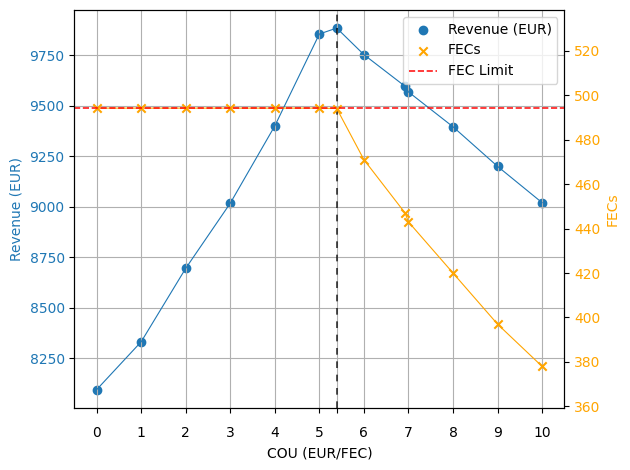

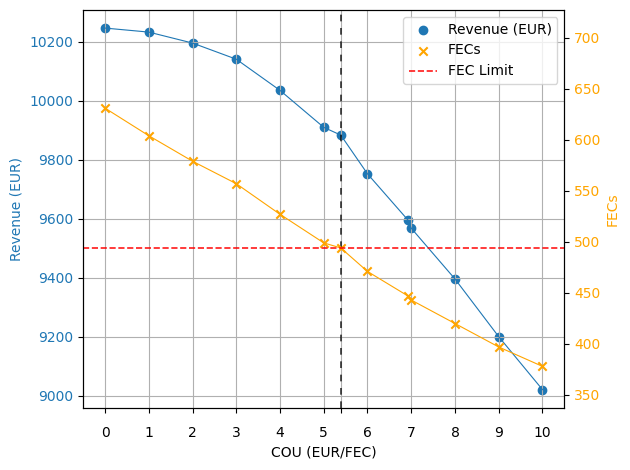

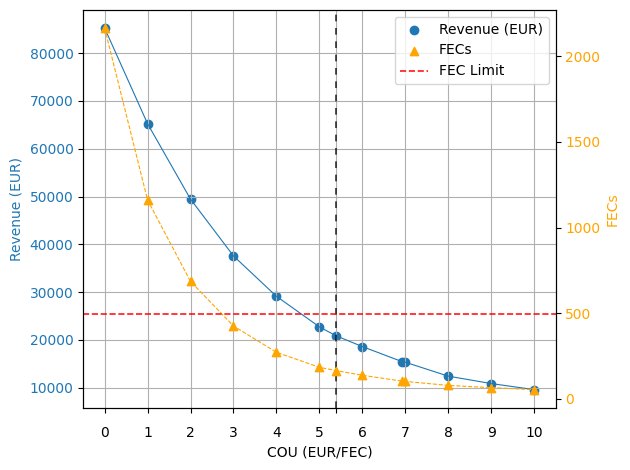

In [14]:
def plot_DA_revenue_cycles(bounded):
    fig, ax1 = plt.subplots()

    # --- Revenue (left axis) ---
    ax1.scatter(
        bounded["COU"],
        bounded["Revenue"],
        label="Revenue (EUR)",
        marker="o",
        color="C0"
    )
    ax1.plot(
        bounded["COU"],
        bounded["Revenue"],
        linewidth=0.8,
        color="C0"
    )
    ax1.set_xlabel("COU (EUR/FEC)")
    ax1.set_ylabel("Revenue (EUR)", color="C0")
    ax1.tick_params(axis="y", labelcolor="C0")

    # vertical dashed line at COU = 5.389604
    for x in bounded.loc[abs(bounded["COU"] - 5.389604) < 1e-3, "COU"]:
        ax1.axvline(
            x=x,
            linestyle=(0, (4, 4)),
            linewidth=1.2,
            color="black",
            alpha=0.8,
            zorder=5
        )

    # x ticks (remove 6.923932, hide label at 5.4)
    xticks = [x for x in sorted(set(bounded["COU"])) if abs(x - 6.923932) > 1e-3]
    ax1.set_xticks(xticks)
    ax1.set_xticklabels(
        ["" if abs(x - 5.389604) < 1e-3 else f"{int(x)}" for x in xticks]
    )
    ax1.tick_params(axis="x", pad=10)

    # --- Cycles (right axis) ---
    ax2 = ax1.twinx()
    ax2.scatter(
        bounded["COU"],
        bounded["Cycles"],
        label="FECs",
        marker="x",
        color="orange"
    )
    ax2.plot(
        bounded["COU"],
        bounded["Cycles"],
        linewidth=0.8,
        color="orange"
    )

    # FEC limit line
    fec_limit = ax2.axhline(
        y=494.18,
        linestyle="--",
        linewidth=1.2,
        color="red",
        alpha=0.9,
        label="FEC Limit"
    )

    ax2.set_ylabel("FECs", color="orange")
    ax2.tick_params(axis="y", labelcolor="orange")

    # shift y-limits slightly for visual balance
    ymin, ymax = ax2.get_ylim()
    ax2.set_ylim(ymin - 0.1 * (ymax - ymin), ymax + 0.3 * (ymax - ymin))

    # --- Combined legend ---
    h1, l1 = ax1.get_legend_handles_labels()
    h2, l2 = ax2.get_legend_handles_labels()
    ax1.legend(h1 + h2, l1 + l2, loc="best")

    ax1.grid(True)
    fig.subplots_adjust(bottom=0.22)
    fig.tight_layout()
    plt.show()


def plot_ri_results(ri):
    fig, ax1 = plt.subplots()

    # --- Revenue (left axis) ---
    ax1.scatter(
        ri["COU"],
        ri["Revenue"],
        label="Revenue (EUR)",
        marker="o",
        color="C0"
    )
    ax1.plot(
        ri["COU"],
        ri["Revenue"],
        linewidth=0.8,
        color="C0"
    )
    ax1.set_xlabel("COU (EUR/FEC)")
    ax1.set_ylabel("Revenue (EUR)", color="C0")
    ax1.tick_params(axis="y", labelcolor="C0")

    # vertical dashed line at COU = 5.389604
    for x in ri.loc[abs(ri["COU"] - 5.389604) < 1e-3, "COU"]:
        ax1.axvline(
            x=x,
            linestyle=(0, (4, 4)),
            linewidth=1.2,
            color="black",
            alpha=0.8,
            zorder=5
        )

    # x ticks (remove 6.923932, hide label at 5.4)
    xticks = [x for x in sorted(set(ri["COU"])) if abs(x - 6.923932) > 1e-3]
    ax1.set_xticks(xticks)
    ax1.set_xticklabels(
        ["" if abs(x - 5.389604) < 1e-3 else f"{int(x)}" for x in xticks]
    )
    ax1.tick_params(axis="x", pad=10)

    # --- Cycles (right axis) ---
    ax2 = ax1.twinx()
    ax2.scatter(
        ri["COU"],
        ri["Cycles_real"],
        label="FECs",
        marker="^",
        color="orange"
    )
    ax2.plot(
        ri["COU"],
        ri["Cycles_real"],
        linewidth=0.8,
        color="orange",
        linestyle="--"
    )

    # FEC limit line
    fec_limit = ax2.axhline(
        y=494.18,
        linestyle="--",
        linewidth=1.2,
        color="red",
        alpha=0.9,
        label="FEC Limit"
    )

    ax2.set_ylabel("FECs", color="orange")
    ax2.tick_params(axis="y", labelcolor="orange")

    # --- Combined legend ---
    h1, l1 = ax1.get_legend_handles_labels()
    h2, l2 = ax2.get_legend_handles_labels()
    ax1.legend(h1 + h2, l1 + l2, loc="best")

    ax1.grid(True)
    fig.subplots_adjust(bottom=0.22)
    fig.tight_layout()
    plt.show()
plot_DA_revenue_cycles(MILP_results_bounded) #with max_cycles constraint
plot_DA_revenue_cycles(MILP_results_unbounded) #without max_cycles constraint
plot_ri_results(RI_results)

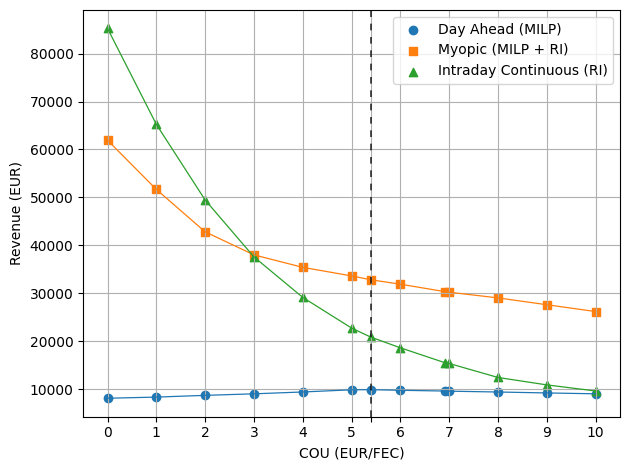

In [16]:
def plot_revenues_over_cou(milp_bounded, myopic, ri):
    fig, ax = plt.subplots()

    ax.scatter(milp_bounded["COU"], milp_bounded["Revenue"], marker="o", label="Day Ahead (MILP)")
    ax.plot(milp_bounded["COU"], milp_bounded["Revenue"], linewidth=0.9)

    ax.scatter(myopic["COU"], myopic["Revenue"], marker="s", label="Myopic (MILP + RI)")
    ax.plot(myopic["COU"], myopic["Revenue"], linewidth=0.9)

    ax.scatter(ri["COU"], ri["Revenue"], marker="^", label="Intraday Continuous (RI)")
    ax.plot(ri["COU"], ri["Revenue"], linewidth=0.9)

    # x ticks: remove 6.923932; keep 5.4 tick but hide label
    xticks = [x for x in sorted(set(milp_bounded["COU"])) if abs(x - 6.923932) > 1e-3]
    ax.set_xticks(xticks)
    ax.set_xticklabels(["" if abs(x - 5.389604) < 1e-3 else f"{int(x)}" for x in xticks])

    ax.set_xlabel("COU (EUR/FEC)")
    # vertical dashed line at COU = 5.389604
    for x in milp_bounded.loc[abs(milp_bounded["COU"] - 5.389604) < 1e-3, "COU"]:
        ax.axvline(
            x=x,
            linestyle=(0, (4, 4)),
            linewidth=1.2,
            color="black",
            alpha=0.8,
            zorder=5
        )
    ax.set_ylabel("Revenue (EUR)")
    ax.grid(True)
    ax.legend(loc="best")

    fig.subplots_adjust(bottom=0.22)
    fig.tight_layout()
    plt.show()
plot_revenues_over_cou(MILP_results_bounded, MyOpic_results_MILP_bounded, RI_results)